In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 12s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)


y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

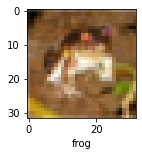

In [8]:
plot_sample(X_train, y_train, 0)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Now let us build a convolutional neural network to train our images

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 37s 6ms/step - loss: 1.4763 - accuracy: 0.4681
Epoch 2/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1217 - accuracy: 0.6063
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9933 - accuracy: 0.6521
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9112 - accuracy: 0.6832
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8512 - accuracy: 0.7052
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7978 - accuracy: 0.7226
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7486 - accuracy: 0.7390
Epoch 8/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7079 - accuracy: 0.7535
Epoch 9/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6719 - accuracy: 0.7662
Epoch 10/100
1563/1563 [==============================] - 9s 6ms/step - 

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 4.3416 - accuracy: 0.6666


[4.341618537902832, 0.6665999889373779]

In [15]:

y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.23521444e-28, 1.98673941e-26, 3.91005219e-25, 9.99999881e-01,
        6.78247787e-08, 5.47144197e-09, 7.45375983e-11, 0.00000000e+00,
        2.54352372e-25, 1.60115279e-34],
       [6.94582572e-30, 5.93004075e-19, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.89425225e-23],
       [8.92898560e-01, 3.27891513e-07, 5.89283342e-13, 4.13325741e-16,
        4.60301068e-13, 1.26601323e-12, 6.67069724e-20, 9.66025177e-11,
        1.07099555e-01, 1.57656063e-06],
       [1.00000000e+00, 1.78846105e-31, 6.80139281e-19, 5.34792978e-20,
        7.46446832e-16, 4.59561118e-28, 1.06799352e-28, 9.03388416e-35,
        2.69298256e-13, 1.48870983e-25],
       [2.54433519e-18, 1.13143341e-28, 3.72422190e-04, 6.49790920e-04,
        2.80991178e-02, 7.08537526e-12, 9.70878661e-01, 2.09277036e-32,
        6.73798910e-18, 2.62337987e-25]], dtype=float32)

In [16]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [17]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

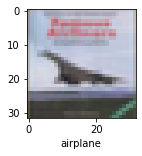

In [18]:
plot_sample(X_test, y_test,3)

In [19]:
classes[y_classes[3]]

'airplane'

In [20]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']